## Part 1:Train Data 만들기

In [1]:
!pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255322 sha256=d67a9e4041c38c2d88adce5f6f0839290989831188206aa66bae0d74707bd212
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle5 as pickle

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
with open('/content/gdrive/My Drive/CA model/data_even.pickle','rb') as f :
    X,y = pickle.load(f)

In [6]:
print(np.shape(X))
print(np.shape(y))

(192000, 20, 20, 2)
(192000, 128)


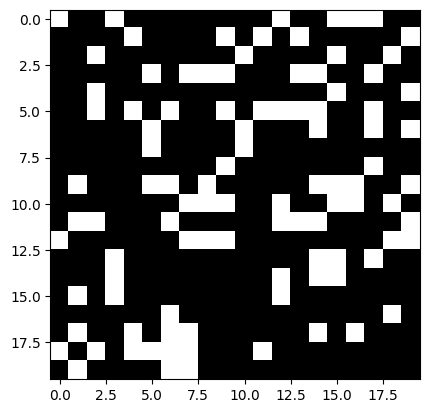

In [7]:
plt.imshow(X[0,:,:,0], cmap="binary")

# Part 2: Neural Nets

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [9]:
# 훈련셋과 검증셋으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,
    y, train_size=0.8)

In [10]:
print(len(X_train))
print(len(X_test))

153600
38400


In [11]:
num_classes = 128
input_shape =(20,20,2)

model = keras.Sequential(
    [
     layers.InputLayer(input_shape = input_shape),
     layers.Conv2D(32, kernel_size = (3,3),activation="relu",padding = 'same'),
     layers.MaxPooling2D(pool_size = (2,2)),
     layers.Conv2D(64, kernel_size = (3,3),activation="relu", padding = 'same'),
     layers.MaxPooling2D(pool_size = (2,2)),
     layers.Conv2D(128, kernel_size = (3,3),activation="relu"),
     layers.Flatten(),
     layers.Dropout(0.8),
     layers.Dense(num_classes, activation="softmax")
    ]
)

batch_size = 100
epochs =100

early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"] )
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,callbacks=[early_stop])

Epoch 1/100
1383/1383 [==============================] - 13s 5ms/step - loss: 2.0139 - accuracy: 0.4374 - val_loss: 0.3452 - val_accuracy: 0.8886
Epoch 2/100
1383/1383 [==============================] - 7s 5ms/step - loss: 0.4776 - accuracy: 0.8275 - val_loss: 0.1537 - val_accuracy: 0.9475
Epoch 3/100
1383/1383 [==============================] - 6s 5ms/step - loss: 0.2888 - accuracy: 0.8950 - val_loss: 0.0908 - val_accuracy: 0.9674
Epoch 4/100
1383/1383 [==============================] - 7s 5ms/step - loss: 0.2011 - accuracy: 0.9289 - val_loss: 0.0670 - val_accuracy: 0.9751
Epoch 5/100
1383/1383 [==============================] - 7s 5ms/step - loss: 0.1458 - accuracy: 0.9483 - val_loss: 0.0450 - val_accuracy: 0.9839
Epoch 6/100
1383/1383 [==============================] - 7s 5ms/step - loss: 0.1125 - accuracy: 0.9606 - val_loss: 0.0307 - val_accuracy: 0.9889
Epoch 7/100
1383/1383 [==============================] - 6s 5ms/step - loss: 0.0883 - accuracy: 0.9693 - val_loss: 0.0204 - val_a

In [14]:
score = model.evaluate(X_test,y_test,verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 0.005989093333482742
Test accuracy 0.9974479079246521


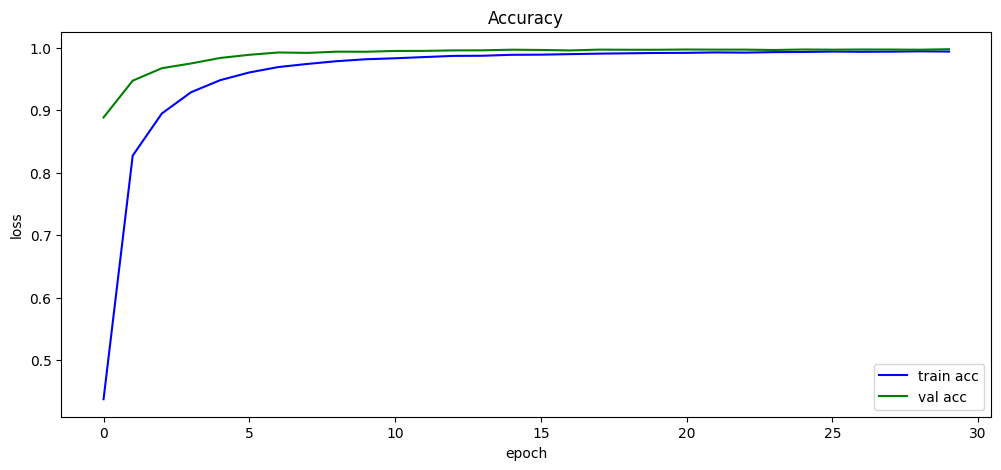

In [12]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], 'b', label='train acc')
plt.plot(history.history['val_accuracy'], 'g', label='val acc')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Accuracy')
plt.show()

In [13]:
model.save('/content/gdrive/My Drive/CA model/p10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
